In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spam.csv',encoding_errors='ignore',usecols=['v1','v2'])

In [3]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

([<matplotlib.patches.Wedge at 0x241c192ed60>,
 [Text(-1.0038714981945518, 0.4497132587689916, ''),
  Text(1.0038714771419537, -0.44971330576360763, '')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.593682'),
  Text(0.5475662602592474, -0.2452981667801496, '13.406317')])

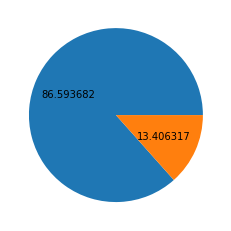

In [5]:
plt.pie(data.v1.value_counts(),autopct='%f')

In [6]:
data[]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
data = data.rename(columns={'v1':'target','v2':'text'})

In [9]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
data['target'] = le.fit_transform(data['target'])

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
import nltk

In [64]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
data['no_of_char'] = data['text'].apply(len)

In [42]:
data['no_of_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [43]:
data['no_of_sent']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [44]:
data

,target,text,no_of_char,no_of_words,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [73]:
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [81]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()


    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [88]:
data.head(1)

,target,text,no_of_char,no_of_words,no_of_sent,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [84]:
data['text_transform']=data['text'].apply(text_transform)

In [93]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_word_length=10,background_color='white')

In [94]:
spam_wc = wc.generate(data[data['target']==1]['text_transform'].str.cat(sep=''))

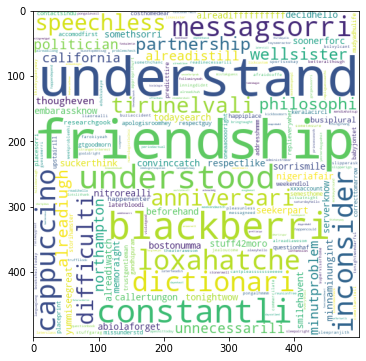

In [99]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
not_spam_wc = wc.generate(data[data['target']==0]['text_transform'].str.cat(sep=''))

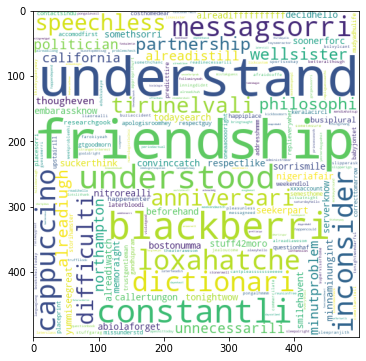

In [106]:
plt.figure(figsize=(12,6))
plt.imshow(not_spam_wc)

In [114]:
spam_corpos = []
for i in data[data['target']==1]['text_transform'].tolist():
    for j in i.split():
        spam_corpos.append(j)
            

In [116]:
len(spam_corpos)

10106

In [119]:
from collections import Counter
mostcommon = pd.DataFrame(Counter(spam_corpos).most_common(50))

In [122]:
## Machine Learning

In [145]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer()
cv = CountVectorizer()

In [146]:
x = tf.fit_transform(data['text_transform']).toarray()

In [147]:
y = data['target']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [150]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [151]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [152]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8771760154738878
0.5324074074074074
[[792 101]
 [ 26 115]]


In [155]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9535783365570599
1.0
[[893   0]
 [ 48  93]]


In [154]:
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.965183752417795
0.972972972972973
[[890   3]
 [ 33 108]]


In [157]:
import pickle

In [158]:
pickle.dump(tf,open('Vectorizer','wb'))
pickle.dump(mnb,open('model','wb'))
